# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

# Additional Data Analayis:

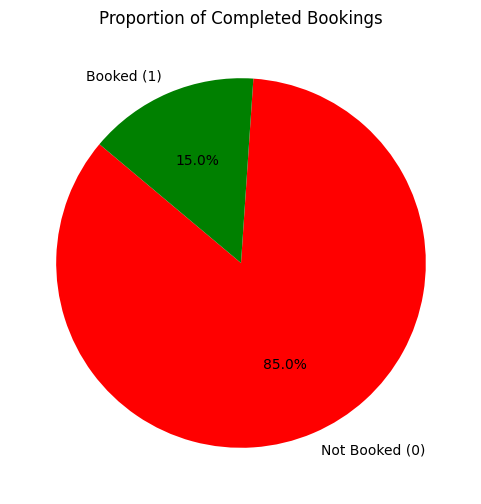

In [ ]:
# Count occurrences of booking_complete values
booking_counts = df["booking_complete"].value_counts()

# Labels for the pie chart
labels = ["Not Booked (0)", "Booked (1)"]

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(booking_counts, labels=labels, autopct="%1.1f%%", colors=["red", "green"], startangle=140)
plt.title("Proportion of Completed Bookings")
plt.show()

<ipython-input-65-65475019be56>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=booking_origin.index, y=booking_origin.values, palette="viridis")


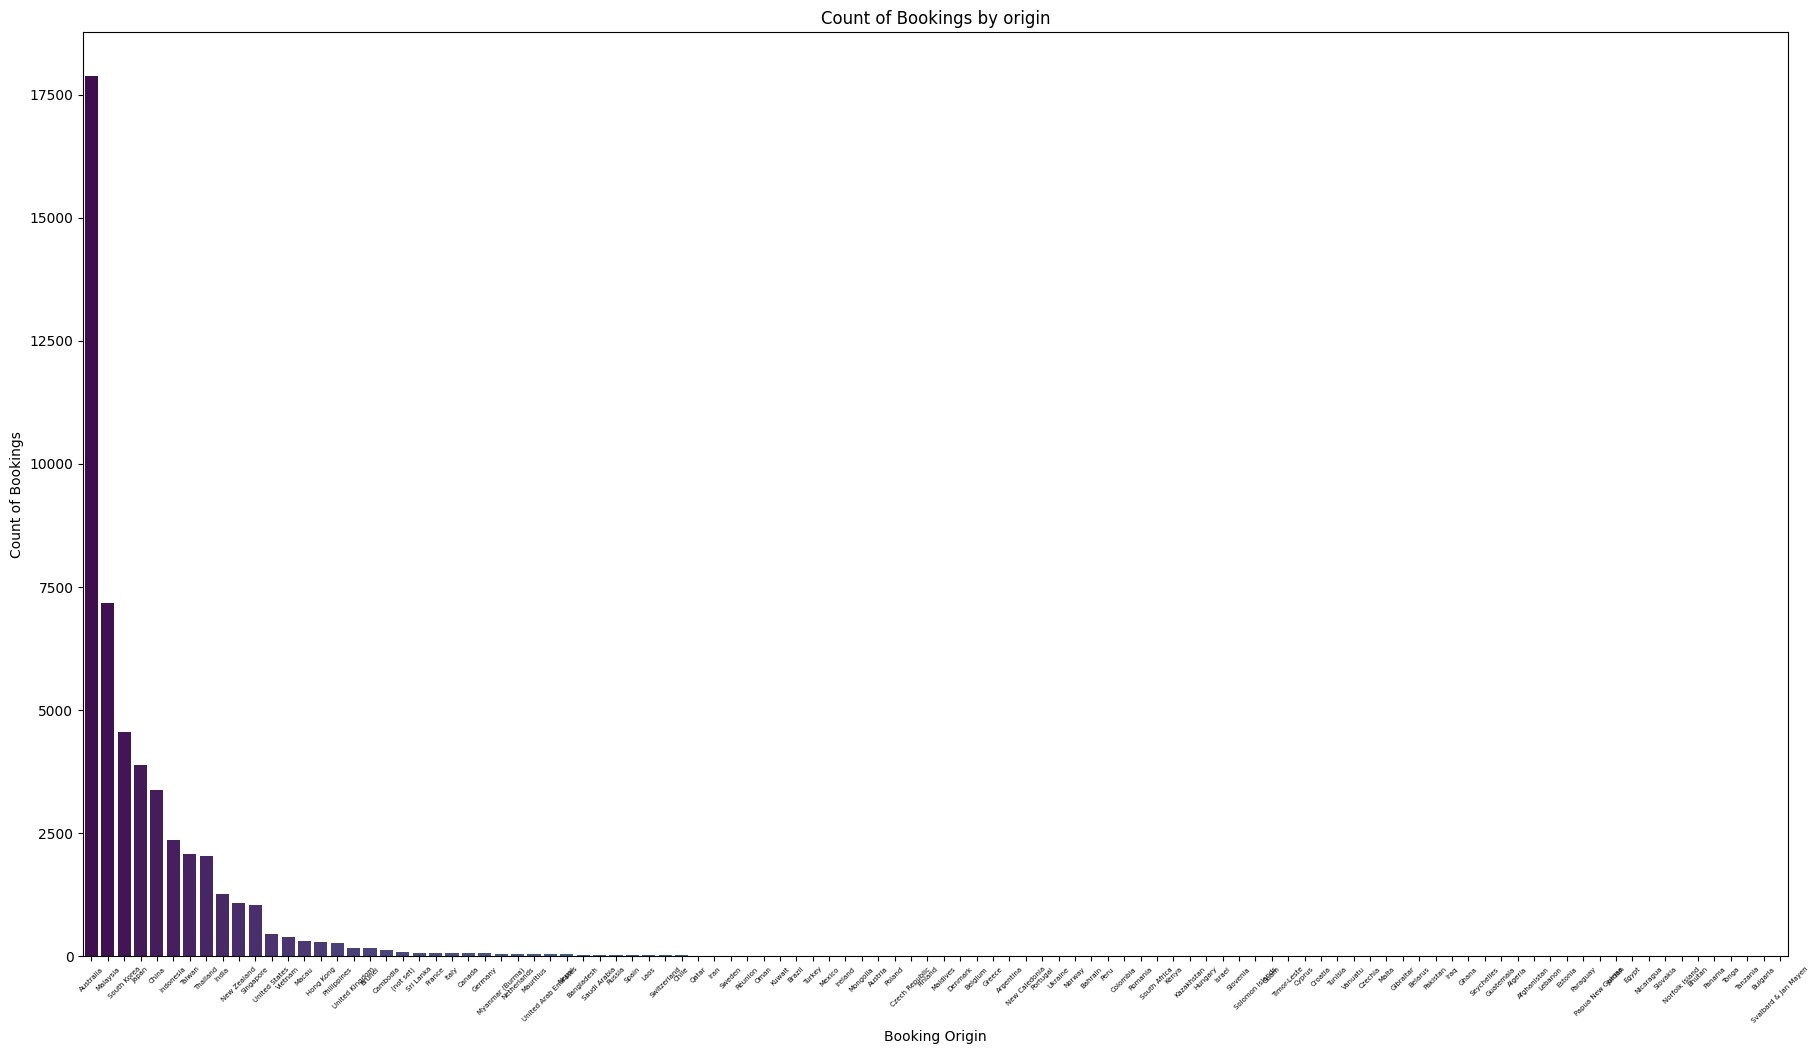

In [ ]:
# Count booking origin
booking_origin = df["booking_origin"].value_counts()

# Plot the bar chart
plt.figure(figsize=(22, 12))
sns.barplot(x=booking_origin.index, y=booking_origin.values, palette="viridis")

plt.xlabel("Booking Origin")
plt.ylabel("Count of Bookings")
plt.title("Count of Bookings by origin")
plt.xticks(rotation=45,size=5)
plt.show()

<ipython-input-66-5b369f9d1df1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flight_day_counts.index, y=flight_day_counts.values, palette="viridis")


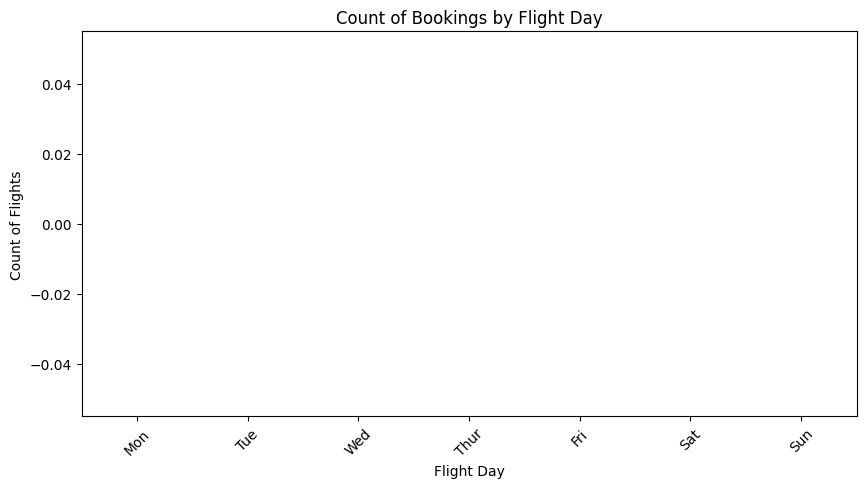

In [ ]:
# Count occurrences of each flight day
flight_day_counts = df["flight_day"].value_counts()

# Sort by weekday order (if necessary)
weekday_order = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"]
flight_day_counts = flight_day_counts.reindex(weekday_order, fill_value=0)

# Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=flight_day_counts.index, y=flight_day_counts.values, palette="viridis")

plt.xlabel("Flight Day")
plt.ylabel("Count of Flights")
plt.title("Count of Bookings by Flight Day")
plt.xticks(rotation=45)
plt.show()

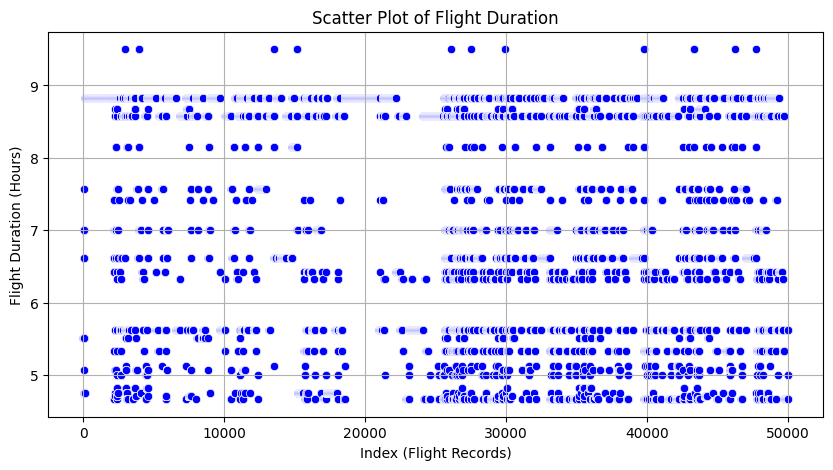

In [ ]:
# Plot the scatter chart
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.index, y="flight_duration", data=df, color="blue")

plt.xlabel("Index (Flight Records)")  # Change to another meaningful variable if needed
plt.ylabel("Flight Duration (Hours)")
plt.title("Scatter Plot of Flight Duration")
plt.grid(True)
plt.show()

# Machine Learning:


*   Cleaning Data:

In [ ]:
#Check Null Column in Dataset
df.isnull().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [ ]:
# Check if all values in the DataFrame are numeric
is_numeric = df.applymap(lambda x: isinstance(x, (int, float))).all().all()

# Print result
print(f"All values are numeric: {is_numeric}")

<ipython-input-69-df9873b2ee4c>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  is_numeric = df.applymap(lambda x: isinstance(x, (int, float))).all().all()


All values are numeric: False


In [ ]:
#Check unique values of columns to perform encoding

unique_category_values = df['wants_extra_baggage'].unique()

print("Unique values in 'category' column:", unique_category_values)

Unique values in 'category' column: [1 0]


In [ ]:
###############################Encoding###################################

#Sales Channel
SalesChannelDict = {
    'Internet': 1,
    'Mobile' : 2
}

df['sales_channel'] = df['sales_channel'].map(SalesChannelDict).fillna(0)

#Trip Type

TripTypeDict = {
    'RoundTrip': 1,
    'CircleTrip': 2,
    'OneWay': 3
}

df['trip_type'] = df['trip_type'].map(TripTypeDict).fillna(0)


#Flight Day
FlightDayDict = {
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thur': 4,
    'Fri': 5,
    'Sat': 6,
    'Sun': 7
}

df['flight_day'] = df['flight_day'].map(FlightDayDict).fillna(0)


#Booking Origin

# Get unique booking origins
bookingorigin = df['booking_origin'].unique()
boresult = ','.join(f"'{value}'" for value in bookingorigin)

# DataFrame of booking origins
bovalues = pd.DataFrame({'booking_origin': [
    'New Zealand','India','United Kingdom','China','South Korea','Japan','Malaysia','Singapore',
    'Switzerland','Germany','Indonesia','Czech Republic','Vietnam','Thailand','Spain','Romania',
    'Ireland','Italy','Slovakia','United Arab Emirates','Tonga','Réunion','(not set)','Saudi Arabia',
    'Netherlands','Qatar','Hong Kong','Philippines','Sri Lanka','France','Croatia','United States',
    'Laos','Hungary','Portugal','Cyprus','Australia','Cambodia','Poland','Belgium','Oman','Bangladesh',
    'Kazakhstan','Brazil','Turkey','Kenya','Taiwan','Brunei','Chile','Bulgaria','Ukraine','Denmark',
    'Colombia','Iran','Bahrain','Solomon Islands','Slovenia','Mauritius','Nepal','Russia','Kuwait',
    'Mexico','Sweden','Austria','Lebanon','Jordan','Greece','Mongolia','Canada','Tanzania','Peru',
    'Timor-Leste','Argentina','New Caledonia','Macau','Myanmar (Burma)','Norway','Panama','Bhutan',
    'Norfolk Island','Finland','Nicaragua','Maldives','Egypt','Israel','Tunisia','South Africa',
    'Papua New Guinea','Paraguay','Estonia','Seychelles','Afghanistan','Guam','Czechia','Malta',
    'Vanuatu','Belarus','Pakistan','Iraq','Ghana','Gibraltar','Guatemala','Algeria','Svalbard & Jan Mayen'
]})

# Get unique booking origins directly from the DataFrame
bounique_routes = bovalues['booking_origin'].unique()

# Create a numerical encoding dictionary
BoRouteDict = {route: idx + 1 for idx, route in enumerate(bounique_routes)}

# Map the booking origin values in the DataFrame to their numerical encoding
df['booking_origin'] = df['booking_origin'].map(BoRouteDict).fillna(0)


################################Uncomment for debugging

# Print the resulting dictionary and DataFrame
#print("Numerical Encoding Dictionary:")
#print(BoRouteDict)

#print("\nDataFrame with Numerical Encoding:")
#print(bovalues)

################################



In [ ]:
print(boresult)

'New Zealand','India','United Kingdom','China','South Korea','Japan','Malaysia','Singapore','Switzerland','Germany','Indonesia','Czech Republic','Vietnam','Thailand','Spain','Romania','Ireland','Italy','Slovakia','United Arab Emirates','Tonga','Réunion','(not set)','Saudi Arabia','Netherlands','Qatar','Hong Kong','Philippines','Sri Lanka','France','Croatia','United States','Laos','Hungary','Portugal','Cyprus','Australia','Cambodia','Poland','Belgium','Oman','Bangladesh','Kazakhstan','Brazil','Turkey','Kenya','Taiwan','Brunei','Chile','Bulgaria','Ukraine','Denmark','Colombia','Iran','Bahrain','Solomon Islands','Slovenia','Mauritius','Nepal','Russia','Kuwait','Mexico','Sweden','Austria','Lebanon','Jordan','Greece','Mongolia','Canada','Tanzania','Peru','Timor-Leste','Argentina','New Caledonia','Macau','Myanmar (Burma)','Norway','Panama','Bhutan','Norfolk Island','Finland','Nicaragua','Maldives','Egypt','Israel','Tunisia','South Africa','Papua New Guinea','Paraguay','Estonia','Seychelles',

In [ ]:
#Add commas to route for encoding
routevalues = df['route'].unique()
result = ','.join(f"'{value}'" for value in routevalues)
print(result)

'AKLDEL','AKLHGH','AKLHND','AKLICN','AKLKIX','AKLKTM','AKLKUL','AKLMRU','AKLPEK','AKLPVG','AKLTPE','AORICN','AORKIX','AORKTM','AORMEL','BBIMEL','BBIOOL','BBIPER','BBISYD','BDOCTS','BDOCTU','BDOHGH','BDOICN','BDOIKA','BDOKIX','BDOMEL','BDOOOL','BDOPEK','BDOPER','BDOPUS','BDOPVG','BDOSYD','BDOTPE','BDOXIY','BKICKG','BKICTS','BKICTU','BKIHND','BKIICN','BKIKIX','BKIKTM','BKIMEL','BKIMRU','BKIOOL','BKIPEK','BKIPER','BKIPUS','BKIPVG','BKISYD','BKIXIY','BLRICN','BLRMEL','BLRPER','BLRSYD','BOMMEL','BOMOOL','BOMPER','BOMSYD','BTJJED','BTUICN','BTUPER','BTUSYD','BTUWUH','BWNCKG','BWNDEL','BWNHGH','BWNIKA','BWNKTM','BWNMEL','BWNOOL','BWNPER','BWNSYD','BWNTPE','CANDEL','CANIKA','CANMEL','CANMRU','CANOOL','CANPER','CANSYD','CCUMEL','CCUMRU','CCUOOL','CCUPER','CCUSYD','CCUTPE','CEBMEL','CEBOOL','CEBPER','CEBSYD','CGKCKG','CGKCTS','CGKCTU','CGKDEL','CGKHGH','CGKHND','CGKICN','CGKIKA','CGKJED','CGKKIX','CGKKTM','CGKMEL','CGKMRU','CGKOOL','CGKPEK','CGKPER','CGKPUS','CGKPVG','CGKSYD','CGKTPE','CGKWUH','

In [ ]:
# Example DataFrame of routes
routes = pd.DataFrame({'route': ['AKLDEL','AKLHGH','AKLHND','AKLICN','AKLKIX','AKLKTM','AKLKUL','AKLMRU','AKLPEK','AKLPVG','AKLTPE','AORICN','AORKIX','AORKTM','AORMEL','BBIMEL','BBIOOL','BBIPER','BBISYD','BDOCTS','BDOCTU','BDOHGH','BDOICN','BDOIKA','BDOKIX','BDOMEL','BDOOOL','BDOPEK','BDOPER','BDOPUS','BDOPVG','BDOSYD','BDOTPE','BDOXIY','BKICKG','BKICTS','BKICTU','BKIHND','BKIICN','BKIKIX','BKIKTM','BKIMEL','BKIMRU','BKIOOL','BKIPEK','BKIPER','BKIPUS','BKIPVG','BKISYD','BKIXIY','BLRICN','BLRMEL','BLRPER','BLRSYD','BOMMEL','BOMOOL','BOMPER','BOMSYD','BTJJED','BTUICN','BTUPER','BTUSYD','BTUWUH','BWNCKG','BWNDEL','BWNHGH','BWNIKA','BWNKTM','BWNMEL','BWNOOL','BWNPER','BWNSYD','BWNTPE','CANDEL','CANIKA','CANMEL','CANMRU','CANOOL','CANPER','CANSYD','CCUMEL','CCUMRU','CCUOOL','CCUPER','CCUSYD','CCUTPE','CEBMEL','CEBOOL','CEBPER','CEBSYD','CGKCKG','CGKCTS','CGKCTU','CGKDEL','CGKHGH','CGKHND','CGKICN','CGKIKA','CGKJED','CGKKIX','CGKKTM','CGKMEL','CGKMRU','CGKOOL','CGKPEK','CGKPER','CGKPUS','CGKPVG','CGKSYD','CGKTPE','CGKWUH','CGKXIY','CKGCOK','CKGDPS','CKGJHB','CKGKCH','CKGLOP','CKGMAA','CKGMEL','CKGMYY','CKGOOL','CKGPEN','CKGPER','CKGPNH','CKGSBW','CKGSIN','CKGSUB','CKGSYD','CKGTGG','CKGTRZ','CKGTWU','CMBCTS','CMBCTU','CMBHGH','CMBHND','CMBICN','CMBKIX','CMBMEL','CMBMRU','CMBOOL','CMBPEK','CMBPER','CMBPVG','CMBSYD','CMBWUH','CNXHND','CNXICN','CNXKIX','CNXMEL','CNXOOL','CNXPEK','CNXPER','CNXPVG','CNXSYD','CNXTPE','COKCTU','COKHGH','COKICN','COKKIX','COKMEL','COKOOL','COKPER','COKPUS','COKSYD','COKTPE','COKWUH','CRKMEL','CRKOOL','CRKSYD','CSXPER','CTSDMK','CTSDPS','CTSHKT','CTSJHB','CTSKBR','CTSKCH','CTSKNO','CTSLGK','CTSMEL','CTSMYY','CTSOOL','CTSPEN','CTSPER','CTSSGN','CTSSIN','CTSSUB','CTSSYD','CTUDPS','CTUHKT','CTUIKA','CTUJHB','CTUKBV','CTUKCH','CTUKNO','CTUMAA','CTUMEL','CTUMRU','CTUMYY','CTUOOL','CTUPEN','CTUPER','CTUSBW','CTUSIN','CTUSUB','CTUSYD','CTUTGG','CTUTRZ','CTUTWU','CXRMEL','DACHGH','DACHND','DACICN','DACKIX','DACMEL','DACOOL','DACPER','DACSYD','DACTPE','DADMEL','DADOOL','DADSYD','DELDMK','DELDPS','DELHKG','DELHKT','DELHND','DELJHB','DELJOG','DELKBV','DELKCH','DELKIX','DELKNO','DELLGK','DELMEL','DELMFM','DELMNL','DELMRU','DELMYY','DELOOL','DELPEN','DELPER','DELPNH','DELSBW','DELSGN','DELSIN','DELSUB','DELSYD','DELSZX','DMKHGH','DMKHND','DMKICN','DMKIKA','DMKKIX','DMKKTM','DMKMEL','DMKMRU','DMKOOL','DMKPEK','DMKPER','DMKPUS','DMKPVG','DMKSYD','DMKTPE','DPSHGH','DPSHND','DPSICN','DPSIKA','DPSKIX','DPSKTM','DPSMEL','DPSMRU','DPSOOL','DPSPEK','DPSPUS','DPSPVG','DPSSYD','DPSTPE','DPSXIY','GOIKUL','GOIMEL','GOIOOL','GOIPER','GOISYD','HANKTM','HANMEL','HANOOL','HANPER','HANSYD','HDYHGH','HDYKTM','HDYMEL','HDYOOL','HDYPEK','HDYPER','HDYPVG','HDYSYD','HDYTPE','HGHHKT','HGHJHB','HGHJOG','HGHKBR','HGHKBV','HGHKCH','HGHKNO','HGHLGK','HGHLOP','HGHMAA','HGHMEL','HGHMYY','HGHOOL','HGHPEN','HGHPER','HGHSBW','HGHSUB','HGHSYD','HGHTRZ','HKGIKA','HKGKTM','HKGMEL','HKGMRU','HKGOOL','HKGPER','HKGSYD','HKTHND','HKTICN','HKTKIX','HKTKTM','HKTMEL','HKTMRU','HKTOOL','HKTPEK','HKTPER','HKTPUS','HKTPVG','HKTSYD','HKTTPE','HKTXIY','HNDIKA','HNDJOG','HNDKBR','HNDKBV','HNDKCH','HNDKNO','HNDKTM','HNDLGK','HNDLOP','HNDMAA','HNDMEL','HNDMLE','HNDOOL','HNDPEN','HNDPER','HNDPNH','HNDREP','HNDRGN','HNDSBW','HNDSGN','HNDSIN','HNDSUB','HNDSYD','HNDTRZ','HYDMEL','HYDOOL','HYDPER','HYDSYD','HYDWUH','ICNIKA','ICNJED','ICNJHB','ICNKBR','ICNKBV','ICNKCH','ICNKNO','ICNKTM','ICNLGK','ICNMAA','ICNMEL','ICNMLE','ICNMYY','ICNOOL','ICNPEN','ICNPER','ICNREP','ICNRGN','ICNSBW','ICNSDK','ICNSGN','ICNSIN','ICNSUB','ICNSYD','ICNTRZ','ICNVTZ','IKAKCH','IKAKIX','IKALOP','IKAMEL','IKAMFM','IKAMNL','IKAOOL','IKAPEK','IKAPEN','IKAPER','IKAPUS','IKAPVG','IKASGN','IKASIN','IKASUB','IKASYD','IKATPE','JEDJOG','JEDKNO','JEDMEL','JEDMNL','JEDPDG','JEDPEN','JEDSUB','JHBKIX','JHBKTM','JHBMEL','JHBMRU','JHBPEK','JHBPUS','JHBPVG','JHBSYD','JHBTPE','JHBWUH','JHBXIY','JOGKIX','JOGKTM','JOGMEL','JOGOOL','JOGPER','JOGPVG','JOGSYD','JOGTPE','KBRKIX','KBRKTM','KBRMEL','KBROOL','KBRPEK','KBRPER','KBRPVG','KBRSYD','KBRTPE','KBVKTM','KBVMEL','KBVOOL','KBVPEK','KBVPER','KBVPVG','KBVSYD','KCHKIX','KCHKTM','KCHMEL','KCHMRU','KCHOOL','KCHPEK','KCHPER','KCHPUS','KCHPVG','KCHSYD','KCHTPE','KCHXIY','KHHMEL','KHHOOL','KHHPER','KHHSYD','KIXKNO','KIXKTM','KIXLGK','KIXLOP','KIXMAA','KIXMEL','KIXMLE','KIXMYY','KIXOOL','KIXPEN','KIXPER','KIXPNH','KIXREP','KIXRGN','KIXSBW','KIXSGN','KIXSIN','KIXSUB','KIXSYD','KIXTGG','KIXTRZ','KLOMEL','KLOOOL','KNOKTM','KNOMEL','KNOOOL','KNOPEK','KNOPER','KNOPUS','KNOPVG','KNOSYD','KNOTPE','KNOXIY','KOSMEL','KOSOOL','KOSPEK','KOSSYD','KTMMEL','KTMMFM','KTMMYY','KTMPEN','KTMPER','KTMREP','KTMSGN','KTMSIN','KTMSUB','KTMSYD','KTMTGG','KTMTPE','KTMURT','KWLPER','LBUPER','LGKMEL','LGKOOL','LGKPER','LGKPUS','LGKPVG','LGKSYD','LGKTPE','LOPOOL','LOPPEK','LOPPVG','LOPSYD','LOPTPE','LOPXIY','LPQMEL','LPQOOL','LPQPER','LPQTPE','MAAMEL','MAAMRU','MAAOOL','MAAPER','MAAPVG','MAASYD','MAATPE','MAAWUH','MELMFM','MELMLE','MELMNL','MELMRU','MELMYY','MELPEK','MELPEN','MELPNH','MELPUS','MELPVG','MELREP','MELRGN','MELSBW','MELSGN','MELSIN','MELSUB','MELSWA','MELSZX','MELTGG','MELTPE','MELTRZ','MELTWU','MELURT','MELUTP','MELVTE','MELVTZ','MELWUH','MELXIY','MFMOOL','MFMPER','MFMSYD','MLEPEK','MLEPER','MLESYD','MNLMRU','MNLOOL','MNLPER','MNLSYD','MRUOOL','MRUPEK','MRUPEN','MRUPER','MRUPVG','MRUSGN','MRUSIN','MRUSUB','MRUSYD','MRUSZX','MYYOOL','MYYPER','MYYPUS','MYYSYD','MYYXIY','NRTSYD','OOLPEK','OOLPEN','OOLPNH','OOLPUS','OOLPVG','OOLREP','OOLRGN','OOLSBW','OOLSDK','OOLSGN','OOLSIN','OOLSUB','OOLSZX','OOLTGG','OOLTPE','OOLTRZ','OOLTWU','OOLURT','OOLUTP','OOLVTE','OOLWUH','OOLXIY','PEKPEN','PEKPER','PEKREP','PEKRGN','PEKSBW','PEKSIN','PEKSUB','PEKSYD','PEKTGG','PEKTRZ','PEKTWU','PENPER','PENPUS','PENPVG','PENSYD','PENTPE','PENWUH','PENXIY','PERPNH','PERPUS','PERPVG','PERREP','PERRGN','PERSBW','PERSDK','PERSGN','PERSIN','PERSWA','PERSZX','PERTGG','PERTPE','PERTRZ','PERTWU','PERUTP','PERVTE','PERVTZ','PERWUH','PERXIY','PNHSYD','PNHTPE','PNKTPE','PUSRGN','PUSSBW','PUSSGN','PUSSIN','PUSSUB','PUSSYD','PUSTRZ','PVGREP','PVGRGN','PVGSIN','PVGSUB','PVGSYD','PVGTGG','PVGTWU','PVGURT','REPSYD','REPTPE','RGNSYD','RGNTPE','SBWSYD','SBWTPE','SBWXIY','SDKSYD','SGNSYD','SGNXIY','SINSYD','SINTPE','SINWUH','SINXIY','SRGTPE','SUBSYD','SUBTPE','SUBXIY','SYDSZX','SYDTPE','SYDTRZ','SYDTWU','SYDVTE','SYDVTZ','SYDXIY','TGGTPE','TGGXIY','TPETRZ','TPEVTE','TRZWUH','TRZXIY','TWUXIY','HGHSGN','ICNTGG','JHBOOL','KBRXIY','KBVTPE','KIXTWU','LBUTPE','PVGSGN','SBWWUH','DELREP','DPSWUH','HKGJED','KBVKIX','KBVPUS','KIXLPQ','LGKPEK','LGKXIY','LOPPER','PEKSGN','PERSUB','TPETWU','BDOWUH','BKIDEL','CKGSGN','CTUKBR','CTULGK','CTUREP','DACMRU','DACPEK','DELRGN','HDYXIY','HGHTGG','HKTWUH','ICNVTE','KBRPUS','KCHWUH','KLOSYD','KNOWUH','MLETPE','SDKTPE','SUBWUH','TWUWUH','AORPUS','BTUCKG','BWNWUH','CKGKNO','CKGLGK','CNXDEL','CNXPUS','CTSJOG','CTSSBW','CTUDMK','CTULOP','DELKBR','DELURT','HDYKIX','HGHSIN','HGHTWU','HYDMRU','IKASZX','KBVWUH','KBVXIY','KIXLBU','LGKWUH','MELNRT','MLEOOL','MRUTPE','TPEURT','URTXIY','AORPER','CKGHKT','CKGMRU','CNXXIY','COKCTS','CSXMRU','CSXSYD','CTUMLE','CTUSGN','CTUSRG','CTUURT','DACPUS','HGHMRU','HKTIKA','HKTJED','ICNMRU','JEDMFM','KBRWUH','KIXMRU','KTMTWU','MLEPVG','MRUXIY']})

# Get all unique route values directly from the DataFrame
unique_routes = routes['route'].unique()

# Create a numerical encoding dictionary
RouteDict = {route: idx + 1 for idx, route in enumerate(unique_routes)}

# Map the route values in the DataFrame to their numerical encoding
df['route'] = df['route'].map(RouteDict).fillna(0)

# Print the resulting dictionary and DataFrame
print("Numerical Encoding Dictionary:")
print(RouteDict)
print("\nDataFrame with Numerical Encoding:")
print(routes)


Numerical Encoding Dictionary:
{'AKLDEL': 1, 'AKLHGH': 2, 'AKLHND': 3, 'AKLICN': 4, 'AKLKIX': 5, 'AKLKTM': 6, 'AKLKUL': 7, 'AKLMRU': 8, 'AKLPEK': 9, 'AKLPVG': 10, 'AKLTPE': 11, 'AORICN': 12, 'AORKIX': 13, 'AORKTM': 14, 'AORMEL': 15, 'BBIMEL': 16, 'BBIOOL': 17, 'BBIPER': 18, 'BBISYD': 19, 'BDOCTS': 20, 'BDOCTU': 21, 'BDOHGH': 22, 'BDOICN': 23, 'BDOIKA': 24, 'BDOKIX': 25, 'BDOMEL': 26, 'BDOOOL': 27, 'BDOPEK': 28, 'BDOPER': 29, 'BDOPUS': 30, 'BDOPVG': 31, 'BDOSYD': 32, 'BDOTPE': 33, 'BDOXIY': 34, 'BKICKG': 35, 'BKICTS': 36, 'BKICTU': 37, 'BKIHND': 38, 'BKIICN': 39, 'BKIKIX': 40, 'BKIKTM': 41, 'BKIMEL': 42, 'BKIMRU': 43, 'BKIOOL': 44, 'BKIPEK': 45, 'BKIPER': 46, 'BKIPUS': 47, 'BKIPVG': 48, 'BKISYD': 49, 'BKIXIY': 50, 'BLRICN': 51, 'BLRMEL': 52, 'BLRPER': 53, 'BLRSYD': 54, 'BOMMEL': 55, 'BOMOOL': 56, 'BOMPER': 57, 'BOMSYD': 58, 'BTJJED': 59, 'BTUICN': 60, 'BTUPER': 61, 'BTUSYD': 62, 'BTUWUH': 63, 'BWNCKG': 64, 'BWNDEL': 65, 'BWNHGH': 66, 'BWNIKA': 67, 'BWNKTM': 68, 'BWNMEL': 69, 'BWNOOL': 7

In [ ]:
#Check if df is now numeric
# Check if all values in the DataFrame are numeric
is_numeric = df.applymap(lambda x: isinstance(x, (int, float))).all().all()

# Print result
print(f"All values are numeric: {is_numeric}")

<ipython-input-75-726a5fb05fcf>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  is_numeric = df.applymap(lambda x: isinstance(x, (int, float))).all().all()


All values are numeric: True


In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,0.0,1,1,1,0,0,5.52,0
1,1,1,1,112,20,3,0.0,1,1,0,0,0,5.52,0
2,2,1,1,243,22,17,0.0,1,2,1,1,0,5.52,0
3,1,1,1,96,31,4,0.0,1,1,0,0,1,5.52,0
4,2,1,1,68,22,15,0.0,1,2,1,0,1,5.52,0


In [ ]:
#Check unique values of columns to perform encoding

unique_category_values = df['route'].unique()

print("Unique values in 'category' column:", unique_category_values)

Unique values in 'category' column: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 23

In [ ]:
print(df)

       num_passengers  sales_channel  trip_type  purchase_lead  \
0                   2              1          1            262   
1                   1              1          1            112   
2                   2              1          1            243   
3                   1              1          1             96   
4                   2              1          1             68   
...               ...            ...        ...            ...   
49995               2              1          1             27   
49996               1              1          1            111   
49997               1              1          1             24   
49998               1              1          1             15   
49999               1              1          1             19   

       length_of_stay  flight_hour  flight_day  route  booking_origin  \
0                  19            7         0.0      1               1   
1                  20            3         0.0      1        

Aim is to predict if a customer will

*   Aim is to predict if a customer will make a booking

# Machine Learning Model 1 - Linear Regression:

In [ ]:
# Split data (80% Train, 20% Test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Display results
#print("Train Set:\n", train_df)
#print("\nTest Set:\n", test_df)

# Prepare training data
X_train = train_df.drop(columns=['booking_complete'])  # Features
y_train = train_df['booking_complete']  # Target

# Prepare test data
X_test = test_df.drop(columns=['booking_complete'])  # Features only

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the Premium Amount for the test dataset
predictions = model.predict(X_test)

# Create a submission DataFrame with exact row count and format
submission = pd.DataFrame({
    'booking_complete': ['booked' if x >= 0.2 else 'not booked' for x in predictions],  # Human-readable predictions
    'booking_complete_score_>=0.2 = Booked': predictions  # Original numeric predictions
})

# Save to CSV
submission.to_csv('PredictionsModelLinearRegression.csv', index=False)

print(f"Submission file 'PredictionsModelLinearRegression.csv' created with {len(submission)} rows.")

Submission file 'PredictionsModelLinearRegression.csv' created with 10000 rows.


In [ ]:
# Try different thresholds and see the results
thresholds = np.arange(0.1, 0.5, 0.05)  # Test thresholds from 0.1 to 0.5 in steps of 0.05

y_test = test_df['booking_complete']  # Actual values

for threshold in thresholds:
    predicted_classes = (predictions >= threshold).astype(int)
    print(f"\nThreshold: {threshold}")
    print(confusion_matrix(y_test, predicted_classes))
    print(classification_report(y_test, predicted_classes))


Threshold: 0.1
[[2593 5927]
 [ 163 1317]]
              precision    recall  f1-score   support

           0       0.94      0.30      0.46      8520
           1       0.18      0.89      0.30      1480

    accuracy                           0.39     10000
   macro avg       0.56      0.60      0.38     10000
weighted avg       0.83      0.39      0.44     10000


Threshold: 0.15000000000000002
[[4567 3953]
 [ 376 1104]]
              precision    recall  f1-score   support

           0       0.92      0.54      0.68      8520
           1       0.22      0.75      0.34      1480

    accuracy                           0.57     10000
   macro avg       0.57      0.64      0.51     10000
weighted avg       0.82      0.57      0.63     10000


Threshold: 0.20000000000000004
[[6318 2202]
 [ 707  773]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      8520
           1       0.26      0.52      0.35      1480

    accuracy         

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

# Data Presentation after learning:

In [ ]:
#Lets look at the data

DataLearned = pd.read_csv('PredictionsModelLinearRegression.csv')
DataLearned.head()

,booking_complete,booking_complete_score_>=0.2 = Booked
0,booked,0.261033
1,not booked,0.101503
2,not booked,0.125353
3,booked,0.266697
4,booked,0.233308


In [ ]:
print("Ammount of people who booked a flight:\n")
print(DataLearned.booking_complete	.value_counts()['booked'])
print("\n")
print("Ammount of people who did not book a flight:\n")
print(DataLearned.booking_complete	.value_counts()['not booked'])

Ammount of people who booked a flight:

2975


Ammount of people who did not book a flight:

7025


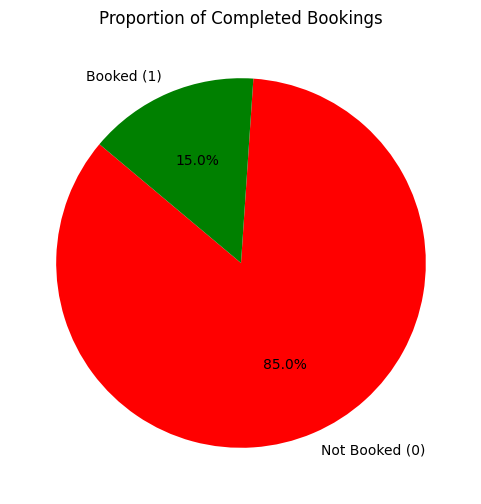

In [ ]:
# Count occurrences of booking_complete values
booked_flights = DataLearned["booking_complete"].value_counts()

# Labels for the pie chart
labels = ["Not Booked (0)", "Booked (1)"]

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(booking_counts, labels=labels, autopct="%1.1f%%", colors=["red", "green"], startangle=140)
plt.title("Proportion of Completed Bookings")
plt.show()